<a href="https://colab.research.google.com/github/harshita0147/Harshita_Pamu_INFO5731_Fall2024/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic

def basic_tokenize(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.split()

def preprocess_text(text):
    stop_words = {
        'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',
        'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
        'to', 'was', 'were', 'will', 'with', 'movie', 'film', 'this',
        'they', 'i', 'we', 'you', 'he', 'she', 'it', 'what', 'which',
        'who', 'when', 'where', 'why', 'how'
    }
    tokens = basic_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)

def analyze_topics(df, text_column):
    print("Preprocessing text...")
    df['processed_text'] = df[text_column].apply(preprocess_text)
    results = {}

    # TF-IDF Features
    print("\nGenerating TF-IDF features...")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])

    # Count Features
    print("Generating Count features...")
    count_vectorizer = CountVectorizer(max_features=5000)
    count_features = count_vectorizer.fit_transform(df['processed_text'])

    # LSA Topic Modeling
    print("\nPerforming LSA...")
    lsa_model = TruncatedSVD(n_components=10, random_state=42)
    lsa_output = lsa_model.fit_transform(tfidf_features)
    lsa_topics = {}
    feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lsa_model.components_):
        lsa_topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    results['LSA'] = lsa_topics

    # LDA Topic Modeling
    print("Performing LDA...")
    lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
    lda_output = lda_model.fit_transform(count_features)
    lda_topics = {}
    feature_names = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        lda_topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    results['LDA'] = lda_topics

    # BERTopic Modeling
    print("Performing BERTopic analysis...")
    bertopic_model = BERTopic(nr_topics=10)
    topics, _ = bertopic_model.fit_transform(df['processed_text'].tolist())
    bert_topics = {}
    for topic in range(10):
        words = bertopic_model.get_topic(topic)
        if words:  # Check if the topic exists
            bert_topics[f"Topic {topic+1}"] = [word[0] for word in words[:10]]
    results['BERTopic'] = bert_topics

    return results

def main():
    try:
        print("\nLoading dataset...")
        df = pd.read_excel('/content/imdb_reviews_5000.xlsx')
        print(f"Dataset loaded successfully! Number of rows: {len(df)}")

        # Print column names
        print("\nAvailable columns in the dataset:")
        print(df.columns)

        # Perform topic modeling
        topics = analyze_topics(df, 'Review')  # Ensure the column name matches the dataset

        # Print results
        print("\nTopic Modeling Results:")
        print("=" * 50)
        for model_name, model_topics in topics.items():
            print(f"\n{model_name} Results:")
            print("-" * 30)
            for topic_name, words in model_topics.items():
                print(f"\n{topic_name}:")
                print(f"Top words: {', '.join(words)}")

    except Exception as e:
        print(f"\nError: {str(e)}")
        print("\nTroubleshooting tips:")
        print("1. Make sure the Excel file path is correct")
        print("2. Verify that the file contains the review text")
        print("3. Check if the column names are as expected")

if __name__ == "__main__":
    main()



Loading dataset...
Dataset loaded successfully! Number of rows: 5000

Available columns in the dataset:
Index(['Review'], dtype='object')
Preprocessing text...

Generating TF-IDF features...
Generating Count features...

Performing LSA...
Performing LDA...
Performing BERTopic analysis...

Topic Modeling Results:

LSA Results:
------------------------------

Topic 1:
Top words: character, development, cinematic, great, masterpiece, striking, poor, visually, story, memorable

Topic 2:
Top words: story, but, heartwarming, memorable, performances, underwhelming, superb, acting, plot, action

Topic 3:
Top words: plot, predictable, points, average, action, amazing, weak, sequences, but, outstanding

Topic 4:
Top words: haunting, outstanding, performance, story, heartwarming, memorable, performances, acting, underwhelming, superb

Topic 5:
Top words: strong, dark, gritty, narrative, performance, haunting, outstanding, music, stunning, visuals

Topic 6:
Top words: depth, resonance, emotional,

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
url = 'https://raw.githubusercontent.com/harshita0147/Harshita_Pamu_INFO5731_Fall2024/de38c9469eeb7f0346f68cdc7bf4fb3bff274cde/AVATAR.csv'

try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
    print("Columns in the dataset:", df.columns)  # Inspect column names
except Exception as e:
    print(f"Error loading dataset: {e}")

# Correct feature and target columns based on inspection
feature_column = 'clean_text'  # Text data
target_column = 'sentiment'    # Sentiment labels

# Verify and proceed if columns exist
if feature_column in df.columns and target_column in df.columns:
    X = df[feature_column]
    y = df[target_column]

    # Split the dataset into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert text data to TF-IDF features
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Initialize Logistic Regression and SVM models
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    svm = SVC(kernel='linear', probability=True, random_state=42)

    # Perform 5-fold cross-validation on Logistic Regression
    log_reg_cv_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print(f'Logistic Regression CV Accuracy: {log_reg_cv_scores.mean()}')

    # Perform 5-fold cross-validation on SVM
    svm_cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print(f'SVM CV Accuracy: {svm_cv_scores.mean()}')

    # Train both models on the full training set
    log_reg.fit(X_train_tfidf, y_train)
    svm.fit(X_train_tfidf, y_train)

    # Predict on the test set using Logistic Regression
    y_pred_log_reg = log_reg.predict(X_test_tfidf)

    # Predict on the test set using SVM
    y_pred_svm = svm.predict(X_test_tfidf)

    # Calculate performance metrics for Logistic Regression
    log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
    log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')
    log_reg_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
    log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

    print("\nLogistic Regression Metrics:")
    print(f"Accuracy: {log_reg_accuracy}")
    print(f"Precision: {log_reg_precision}")
    print(f"Recall: {log_reg_recall}")
    print(f"F1 Score: {log_reg_f1}")

    # Calculate performance metrics for SVM
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
    svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
    svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

    print("\nSVM Metrics:")
    print(f"Accuracy: {svm_accuracy}")
    print(f"Precision: {svm_precision}")
    print(f"Recall: {svm_recall}")
    print(f"F1 Score: {svm_f1}")

    # Step 5: Comparison Summary
    print("\nComparison Summary:")
    print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, F1 Score: {log_reg_f1}")
    print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1 Score: {svm_f1}")
else:
    print(f"Error: Columns '{feature_column}' or '{target_column}' not found in the dataset!")


Dataset loaded successfully!
Columns in the dataset: Index(['document_id', 'clean_text', 'sentiment'], dtype='object')
Logistic Regression CV Accuracy: 0.825
SVM CV Accuracy: 0.875

Logistic Regression Metrics:
Accuracy: 0.9
Precision: 0.925
Recall: 0.9
F1 Score: 0.9

SVM Metrics:
Accuracy: 0.9
Precision: 0.925
Recall: 0.9
F1 Score: 0.9

Comparison Summary:
Logistic Regression - Accuracy: 0.9, Precision: 0.925, Recall: 0.9, F1 Score: 0.9
SVM - Accuracy: 0.9, Precision: 0.925, Recall: 0.9, F1 Score: 0.9


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB

First 5 Rows of the Data:
                                              Review
0  A cinematic masterpiece with great character d...
1  The plot was weak, but the action sequences we...
2  A visually striking film with poor character d...
3  The acting was superb, but the story was under...
4  A heartwarming story with memorable performances.

Exploratory Data Analysis:

Missing Values by Column:
Review    0
dtype: int64

Sentiment Analysis Added (First 5 Rows):
    

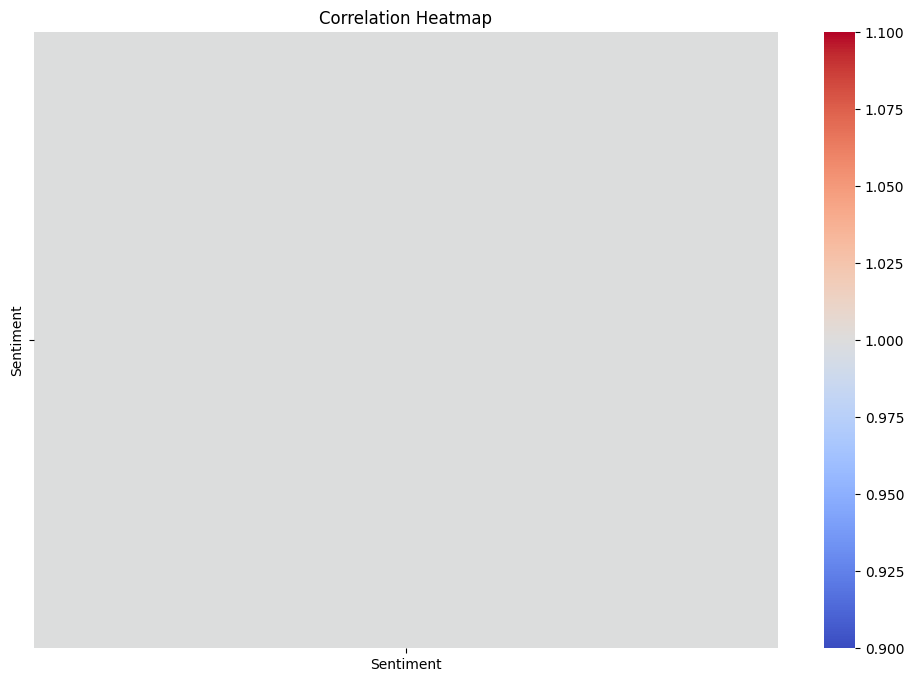


Data Cleaning:
Dropped Columns (More Than 30% Missing): []

Feature Selection:
Top Features Correlated with Sentiment:
Index(['Review_A heartwarming story with memorable performances.',
       'Review_An outstanding movie with a haunting performance.',
       'Review_The acting was superb, but the story was underwhelming.',
       'Review_A cinematic masterpiece with great character development.',
       'Review_An inspiring movie with emotional depth and resonance.',
       'Review_The plot was weak, but the action sequences were amazing.',
       'Review_A dark and gritty movie with a strong narrative.',
       'Review_A visually striking film with poor character development.',
       'Review_An average movie with predictable plot points.'],
      dtype='object')

Splitting Data:
Training Set Shape: (4000, 9), Testing Set Shape: (1000, 9)

Model Training:
Linear Regression Model Trained
Random Forest Regressor Trained

Model Evaluation:
Linear Regression:
 MSE: 8.884264759279765e-31

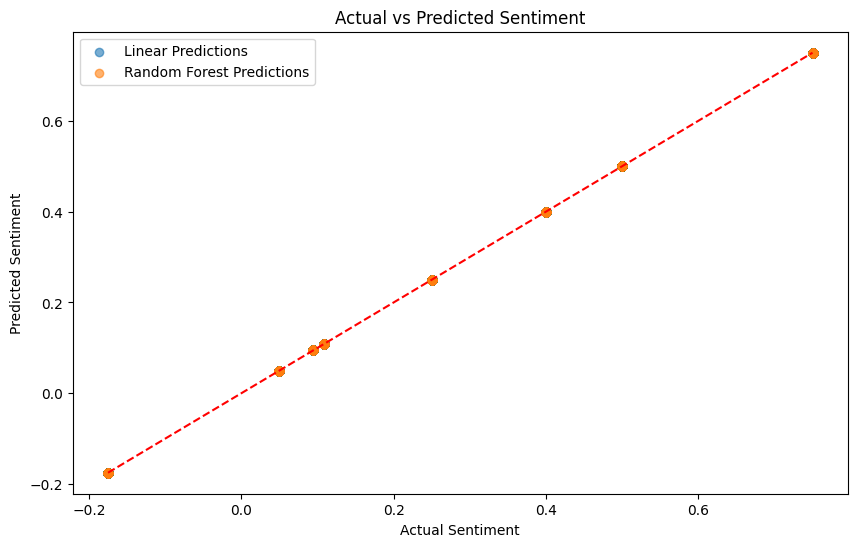

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
import logging

# Configure logging to save outputs to a file
logging.basicConfig(filename='output.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Load the dataset
data = pd.read_excel('/content/imdb_reviews_5000.xlsx')  # Replace with the actual dataset file

# Display dataset info
print("Dataset Info:")
print(data.info())
logging.info("Dataset Info:\n" + str(data.info()))

print("\nFirst 5 Rows of the Data:")
print(data.head())
logging.info("First 5 Rows of the Data:\n" + str(data.head()))

# --- Step 1: EDA ---
print("\nExploratory Data Analysis:")

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values by Column:")
print(missing_values)
logging.info("Missing Values by Column:\n" + str(missing_values))

# Handle text data: Convert 'Review' column to sentiment polarity
if 'Review' in data.columns:
    data['Sentiment'] = data['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    print("\nSentiment Analysis Added (First 5 Rows):")
    print(data[['Review', 'Sentiment']].head())
    logging.info("Sentiment Analysis Added:\n" + str(data[['Review', 'Sentiment']].head()))

# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap and save it
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

# --- Step 2: Data Cleaning ---
print("\nData Cleaning:")

# Drop columns with too many missing values
missing_threshold = 0.3
cols_to_drop = data.columns[data.isnull().mean() > missing_threshold]
data = data.drop(cols_to_drop, axis=1)
print(f"Dropped Columns (More Than 30% Missing): {cols_to_drop.tolist()}")
logging.info(f"Dropped Columns (More Than 30% Missing): {cols_to_drop.tolist()}")

# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values in numeric columns with median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values in non-numeric columns with "Unknown"
data[non_numeric_columns] = data[non_numeric_columns].fillna("Unknown")

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# --- Step 3: Feature Selection ---
print("\nFeature Selection:")
# Determine the target variable
target = 'Sentiment'  # Replace with the actual target column name
if target not in data.columns:
    raise ValueError(f"Target variable '{target}' not found in the dataset.")

# Correlation with the target variable
correlation = data.corr()[target].sort_values(ascending=False)

# Select top 20 correlated features (excluding the target)
selected_features = correlation.index[1:21]
print(f"Top Features Correlated with {target}:\n{selected_features}")
logging.info(f"Top Features Correlated with {target}:\n{selected_features}")

# --- Step 4: Data Splitting ---
print("\nSplitting Data:")
X = data[selected_features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")
logging.info(f"Training Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

# --- Step 5: Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Step 6: Model Training ---
print("\nModel Training:")

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear Regression Model Trained")
logging.info("Linear Regression Model Trained")

# Random Forest Model (for comparison)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
print("Random Forest Regressor Trained")
logging.info("Random Forest Regressor Trained")

# --- Step 7: Evaluation ---
print("\nModel Evaluation:")

# Linear Regression Evaluation
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression:\n MSE: {mse_linear}, R2 Score: {r2_linear}")
logging.info(f"Linear Regression:\n MSE: {mse_linear}, R2 Score: {r2_linear}")

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor:\n MSE: {mse_rf}, R2 Score: {r2_rf}")
logging.info(f"Random Forest Regressor:\n MSE: {mse_rf}, R2 Score: {r2_rf}")

# --- Step 8: Visualization ---
print("\nVisualization:")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Linear Predictions')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.legend()
plt.title('Actual vs Predicted Sentiment')
plt.savefig("actual_vs_predicted.png")
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
import pandas as pd
from transformers import pipeline

# Load the dataset
data_path = '/content/imdb_reviews_5000.xlsx'  # Update this path if necessary
data = pd.read_excel(data_path)

# Display column names to understand the dataset structure
print("Dataset columns:", data.columns)

# Check if the dataset contains the required column
if 'Review' not in data.columns:
    raise ValueError("The dataset must contain a 'Review' column.")

# Extract the reviews
reviews = data['Review']

# If ground truth labels are available, use them. Otherwise, skip evaluation.
has_labels = 'label' in data.columns
true_labels = data['label'] if has_labels else None

# Load a pre-trained model for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_analyzer = pipeline("sentiment-analysis", model=model_name)

# Perform sentiment analysis
predictions = []
for review in reviews:
    result = sentiment_analyzer(review[:512])  # Truncate to 512 tokens for compatibility
    predictions.append(result[0]['label'])

# Convert predictions to binary format ('POSITIVE' -> 1, 'NEGATIVE' -> 0)
predicted_labels = [1 if pred == "POSITIVE" else 0 for pred in predictions]

# If ground truth labels exist, evaluate model performance
if has_labels:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    # Display evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
else:
    print("No 'label' column found in the dataset. Skipping evaluation.")

# Save predictions to the dataset
data['Predicted_Label'] = predicted_labels
output_path = "sentiment_analysis_results.xlsx"
data.to_excel(output_path, index=False)
print(f"Results saved to {output_path}")


Dataset columns: Index(['Review'], dtype='object')


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

No 'label' column found in the dataset. Skipping evaluation.
Results saved to sentiment_analysis_results.xlsx
